In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import yaml


Trying to do MCS studies for Nevis Columbia 2025 SPINE workshop: 

https://indico.nevis.columbia.edu/event/11/timetable/?view=standard

https://docs.google.com/presentation/d/13vJjoj7HTmgEESZjgeeIXX3w-0HaMtFKKA1qNc4PMuI/edit?slide=id.g2ecf727ff29_0_0#slide=id.g2ecf727ff29_0_0

![](screenshot.png)

In [2]:
from spine.driver import Driver


Welcome to JupyROOT 6.26/16


In [3]:
cfg_txt = '''
base:
  verbosity: warning
  iterations: -1
  overwrite_log: true
  log_dir: /nevis/houston/home/leehagaman/spine/mcs_studies/logs

io:
  reader:
    file_keys: DATA_PATH
    name: hdf5
    skip_unknown_attrs: true

build:
  mode: both
  fragments: false
  particles: true
  interactions: true
  units: cm

ana:
  save:
    run_mode: both
    obj_type: particle
    overwrite: true
    particle:
      - pdg_code
      - is_contained
      - is_primary
      - start_point
      - start_dir
      - ke
      - mcs_ke
      - csda_ke
      - calo_ke
'''


In [ ]:
# downloaded from /pnfs/sbnd/persistent/users/mueller/MCP2025B/full_hdf5_test_files/mc5e18/*.h5
DATA_FILES = os.listdir('/nevis/riverside/data/leehagaman/spine/mc5e18')

log_file_location = '/nevis/houston/home/leehagaman/spine/mcs_studies/logs'

for file in os.listdir(log_file_location):
    os.remove(f'{log_file_location}/{file}')


num_files = 5

for file_i, DATA_FILE in enumerate(DATA_FILES[:num_files]):

    DATA_PATH = f'/nevis/riverside/data/leehagaman/spine/mc5e18/{DATA_FILE}'

    cfg = yaml.safe_load(cfg_txt.replace('DATA_PATH', DATA_PATH))
    driver = Driver(cfg)

    driver.run()

    # copy file to the log directory with a new name
    os.rename(f'{log_file_location}/save_truth_particles.csv', f'{log_file_location}/save_truth_particles_{file_i}.csv')

driver.run()


In [5]:
# combine all the log files
log_files = os.listdir('/nevis/houston/home/leehagaman/spine/mcs_studies/logs')
log_files = [f for f in log_files if f.startswith('save_truth_particles_')]

df = pd.concat([pd.read_csv(f"{log_file_location}/{f}") for f in log_files])

df


,index,file_index,file_entry_index,run,subrun,event,truth_is_contained,truth_pdg_code,truth_is_primary,truth_start_point_x,...,reco_start_point_y,reco_start_point_z,reco_start_dir_x,reco_start_dir_y,reco_start_dir_z,reco_ke,reco_calo_ke,reco_csda_ke,reco_mcs_ke,match_overlap
0,0,0,0,715,55,4,False,-13,True,98.850006,...,-199.950010,239.75003,-0.039697,0.906496,-0.420344,1903.281450,824.684200,973.141767,1903.28145,0.923433
1,0,0,0,715,55,4,True,11,False,102.450010,...,172.050020,105.65000,0.881137,0.422938,-0.211473,8.260160,8.260160,-1.000000,-1.00000,0.809524
2,0,0,0,715,55,4,True,11,False,121.950010,...,30.750000,155.15000,-0.707107,0.000000,0.707107,4.978507,4.978507,-1.000000,-1.00000,0.560000
3,0,0,0,715,55,4,True,11,False,123.149994,...,22.950012,157.85000,-0.894445,0.447177,0.000000,0.479706,0.479706,-1.000000,-1.00000,0.400000
4,0,0,0,715,55,4,True,11,False,130.350000,...,-35.549988,176.75000,0.038271,-0.904048,0.425715,6.893617,6.893617,-1.000000,-1.00000,0.612245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,11,0,11,300,10,414,True,22,False,-177.550000,...,113.850006,439.55002,0.801921,-0.449269,-0.393803,104.774180,104.774180,-1.000000,-1.00000,0.065068
420,11,0,11,300,10,414,True,11,False,80.850006,...,-68.550000,172.55002,-0.316242,-0.948678,0.000000,0.419774,0.419774,-1.000000,-1.00000,0.400000
421,11,0,11,300,10,414,True,11,False,59.250000,...,-102.750000,169.55002,-0.393176,-0.827167,-0.401506,11.107666,11.107666,-1.000000,-1.00000,0.661017
422,11,0,11,300,10,414,True,11,False,37.950012,...,-135.450010,168.05002,0.099389,-0.049680,0.993808,4.789709,4.789709,-1.000000,-1.00000,0.793103


In [6]:
muon_df = df.query('abs(truth_pdg_code) == 13')
muon_df

,index,file_index,file_entry_index,run,subrun,event,truth_is_contained,truth_pdg_code,truth_is_primary,truth_start_point_x,...,reco_start_point_y,reco_start_point_z,reco_start_dir_x,reco_start_dir_y,reco_start_dir_z,reco_ke,reco_calo_ke,reco_csda_ke,reco_mcs_ke,match_overlap
0,0,0,0,715,55,4,False,-13,True,98.850006,...,-199.950010,239.75003,-0.039697,0.906496,-0.420344,1903.281450,824.684200,973.141767,1903.281450,0.923433
6,0,0,0,715,55,4,False,13,True,-26.250000,...,60.750000,120.65000,0.089022,-0.895436,0.436198,1361.339762,613.396600,676.509508,1361.339762,0.895564
7,0,0,0,715,55,4,False,-13,True,-23.549988,...,46.649994,379.25003,0.322471,0.698570,-0.638758,86.204956,61.434240,106.547703,86.204956,0.919881
8,0,0,0,715,55,4,False,13,True,-25.350006,...,-156.150010,505.25003,-0.127365,-0.913342,-0.386763,732.095946,111.552570,139.583213,732.095946,0.891304
10,0,0,0,715,55,4,False,-13,True,-22.049988,...,199.950010,500.75003,-0.096499,-0.869123,0.485091,17.295938,17.295938,45.566762,-1.000000,0.906542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,11,0,11,300,10,414,False,13,True,84.750000,...,199.950010,469.55002,-0.657862,-0.615097,-0.434594,1265.268341,331.150450,407.177574,1265.268341,0.574278
398,11,0,11,300,10,414,False,-13,True,103.649994,...,-27.750000,189.35000,-0.301616,0.889691,0.342749,99999.997358,521.764300,588.527700,99999.997358,0.959958
399,11,0,11,300,10,414,False,-13,True,199.650000,...,113.250000,129.65000,-0.215499,0.861343,0.460053,414.979038,215.426040,251.418812,414.979038,0.124618
400,11,0,11,300,10,414,False,13,True,-115.049990,...,-94.050000,71.75001,0.109777,0.873528,0.474234,808.136545,620.371000,1105.471977,808.136545,0.942927


In [7]:
in_fv_start_muon_df = muon_df.query('-200 < truth_start_point_x < 200 and -200 < truth_start_point_y < 200 and 0 < truth_start_point_z < 500 and truth_is_primary==1')
in_fv_start_muon_df

,index,file_index,file_entry_index,run,subrun,event,truth_is_contained,truth_pdg_code,truth_is_primary,truth_start_point_x,...,reco_start_point_y,reco_start_point_z,reco_start_dir_x,reco_start_dir_y,reco_start_dir_z,reco_ke,reco_calo_ke,reco_csda_ke,reco_mcs_ke,match_overlap
0,0,0,0,715,55,4,False,-13,True,98.850006,...,-199.950010,239.75003,-0.039697,0.906496,-0.420344,1903.281450,824.68420,973.141767,1903.281450,0.923433
6,0,0,0,715,55,4,False,13,True,-26.250000,...,60.750000,120.65000,0.089022,-0.895436,0.436198,1361.339762,613.39660,676.509508,1361.339762,0.895564
7,0,0,0,715,55,4,False,-13,True,-23.549988,...,46.649994,379.25003,0.322471,0.698570,-0.638758,86.204956,61.43424,106.547703,86.204956,0.919881
11,0,0,0,715,55,4,False,-13,True,-91.950000,...,-122.250000,387.65002,0.563100,-0.823129,-0.073324,828.172201,201.12476,239.820911,828.172201,0.981289
12,0,0,0,715,55,4,False,-13,True,185.250000,...,-198.750000,234.35000,-0.006520,0.754076,-0.656755,1648.513070,710.80460,810.855423,1648.513070,0.864223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,11,0,11,300,10,414,False,13,True,84.750000,...,199.950010,469.55002,-0.657862,-0.615097,-0.434594,1265.268341,331.15045,407.177574,1265.268341,0.574278
398,11,0,11,300,10,414,False,-13,True,103.649994,...,-27.750000,189.35000,-0.301616,0.889691,0.342749,99999.997358,521.76430,588.527700,99999.997358,0.959958
399,11,0,11,300,10,414,False,-13,True,199.650000,...,113.250000,129.65000,-0.215499,0.861343,0.460053,414.979038,215.42604,251.418812,414.979038,0.124618
400,11,0,11,300,10,414,False,13,True,-115.049990,...,-94.050000,71.75001,0.109777,0.873528,0.474234,808.136545,620.37100,1105.471977,808.136545,0.942927


In [8]:
contained_in_fv_start_muon_df = in_fv_start_muon_df.query('truth_is_contained == 1')
contained_in_fv_start_muon_df

,index,file_index,file_entry_index,run,subrun,event,truth_is_contained,truth_pdg_code,truth_is_primary,truth_start_point_x,...,reco_start_point_y,reco_start_point_z,reco_start_dir_x,reco_start_dir_y,reco_start_dir_z,reco_ke,reco_calo_ke,reco_csda_ke,reco_mcs_ke,match_overlap
300,6,0,6,715,55,242,True,-13,True,-101.850006,...,-39.450012,181.85000,0.693101,-0.494270,-0.524699,3038.787793,421.756070,453.919967,3038.787793,0.496875
433,9,0,9,715,55,452,True,-13,True,140.850000,...,-20.250000,87.65000,-0.386304,-0.892541,0.232678,191.445830,171.162410,191.445830,192.541252,0.932384
78,2,0,2,441,64,68,True,-13,True,60.149994,...,115.050020,152.75000,-0.147475,-0.913105,0.380120,205.798010,179.240200,205.798010,207.279411,0.907195
258,7,0,7,441,64,321,True,-13,True,-130.350000,...,76.950010,337.25003,0.436269,-0.835464,-0.334170,398.847683,360.343750,398.847683,420.266019,0.954545
3,0,0,0,24,28,34,True,-13,True,145.650000,...,28.649994,72.65000,-0.954035,-0.254795,0.157787,790.463298,758.199300,790.463298,682.487859,0.961094
100,3,0,3,24,28,138,True,-13,True,-77.850006,...,-130.650010,285.05002,0.439730,-0.416305,-0.795819,204.025288,187.378900,204.025288,209.873576,0.924276
102,3,0,3,24,28,138,True,13,True,14.549988,...,-11.549988,286.85000,-0.911711,0.407843,0.049467,249.151846,38.667950,76.646184,249.151846,0.507576
194,5,0,5,24,28,215,True,-13,True,-142.650000,...,-147.750000,119.15000,0.248442,-0.583041,-0.773524,93.900898,81.044876,93.900898,133.646024,0.903134
386,9,0,9,24,28,446,True,-13,True,-133.650000,...,157.350000,195.95001,0.646915,-0.717087,0.259396,475.289118,428.563450,475.289118,514.469395,0.987069
454,10,0,10,312,13,355,True,-13,True,-68.250000,...,135.450010,235.85000,0.336481,-0.847482,0.410553,374.222855,325.439640,374.222855,352.996468,0.941304


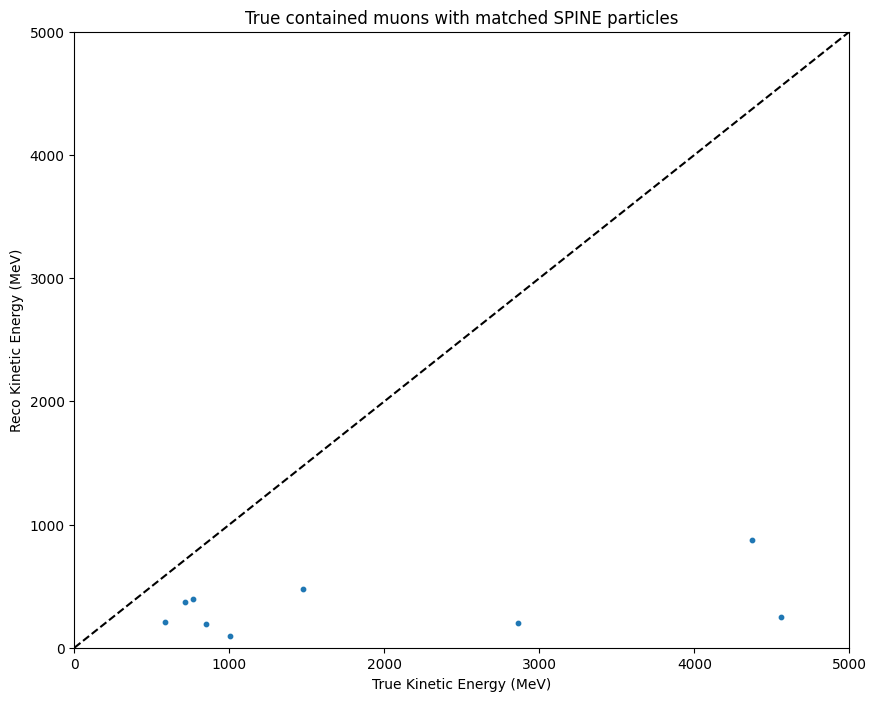

225077.76       3038.79        
851.49          191.45         
586.40          205.80         
764.22          398.85         
12454.46        790.46         
2862.15         204.03         
4560.86         249.15         
1003.62         93.90          
1476.23         475.29         
710.80          374.22         
4371.83         876.66         
38772.05        1213.86        


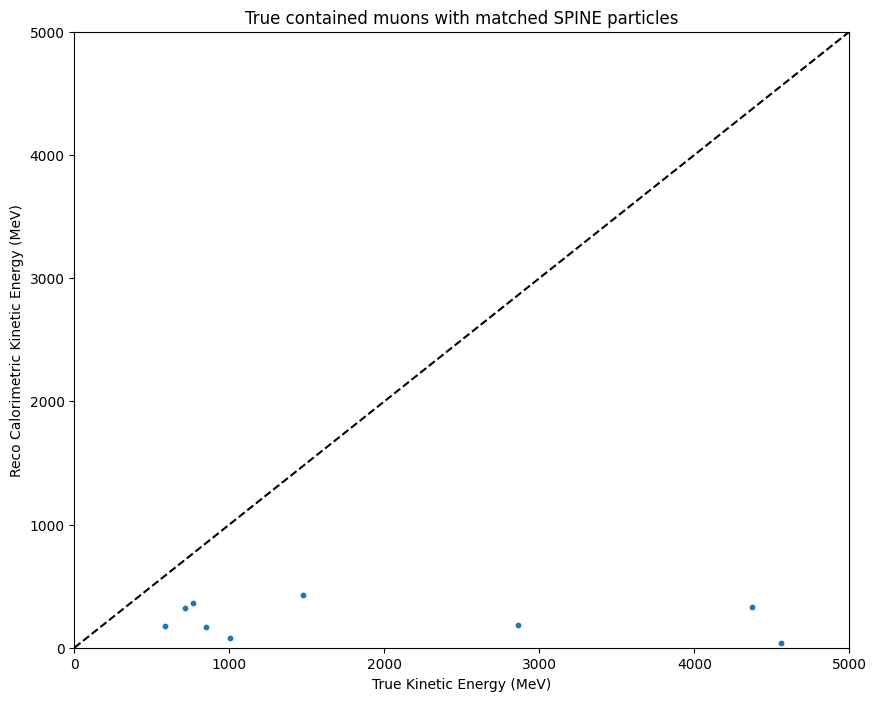

225077.76       421.76         
851.49          171.16         
586.40          179.24         
764.22          360.34         
12454.46        758.20         
2862.15         187.38         
4560.86         38.67          
1003.62         81.04          
1476.23         428.56         
710.80          325.44         
4371.83         329.95         
38772.05        1209.31        


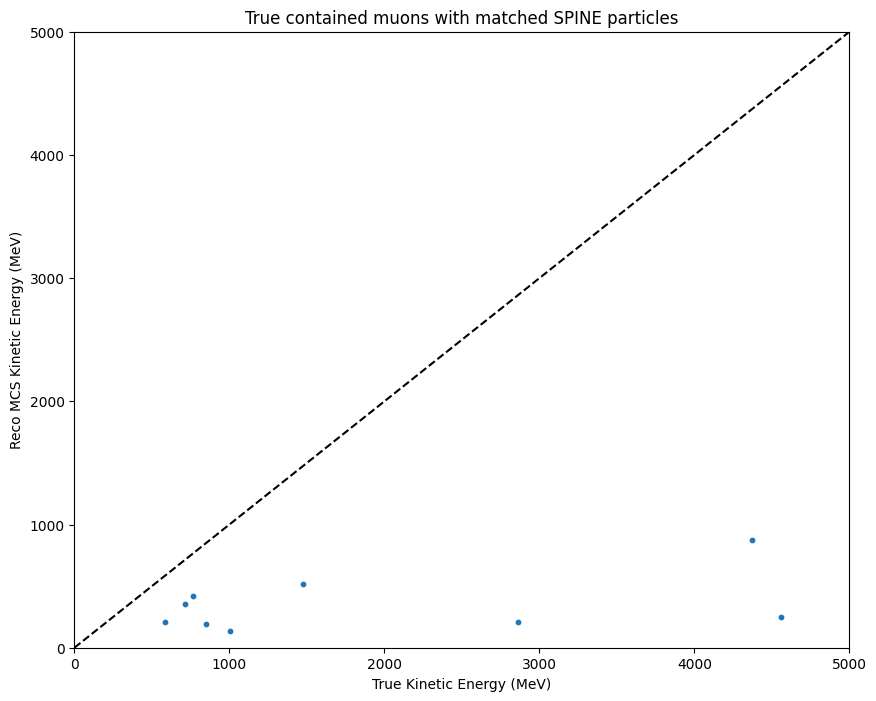

225077.76       3038.79        
851.49          192.54         
586.40          207.28         
764.22          420.27         
12454.46        682.49         
2862.15         209.87         
4560.86         249.15         
1003.62         133.65         
1476.23         514.47         
710.80          353.00         
4371.83         876.66         
38772.05        1095.76        


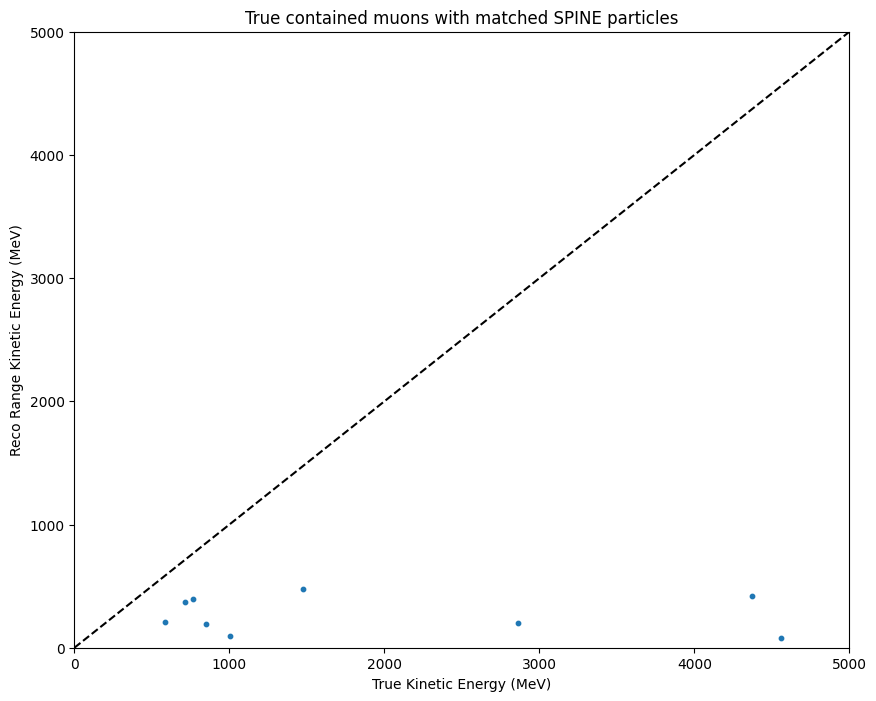

225077.76       453.92         
851.49          191.45         
586.40          205.80         
764.22          398.85         
12454.46        790.46         
2862.15         204.03         
4560.86         76.65          
1003.62         93.90          
1476.23         475.29         
710.80          374.22         
4371.83         421.74         
38772.05        1213.86        


In [14]:
r = (0, 5000)

s = 10

plt.figure(figsize=(10, 8))
plt.scatter(contained_in_fv_start_muon_df['truth_ke'], contained_in_fv_start_muon_df['reco_ke'], s=s)
plt.plot(r, r, 'k--')
plt.xlim(r)
plt.ylim(r)
plt.xlabel('True Kinetic Energy (MeV)')
plt.ylabel('Reco Kinetic Energy (MeV)')
plt.title("True contained muons with matched SPINE particles")
plt.show()
for i in range(len(contained_in_fv_start_muon_df)):
    print(f"{contained_in_fv_start_muon_df['truth_ke'].iloc[i]:.2f}".ljust(15), f"{contained_in_fv_start_muon_df['reco_ke'].iloc[i]:.2f}".ljust(15))

plt.figure(figsize=(10, 8))
plt.scatter(contained_in_fv_start_muon_df['truth_ke'], contained_in_fv_start_muon_df['reco_calo_ke'], s=s)
plt.plot(r, r, 'k--')
plt.xlim(r)
plt.ylim(r)
plt.xlabel('True Kinetic Energy (MeV)')
plt.ylabel('Reco Calorimetric Kinetic Energy (MeV)')
plt.title("True contained muons with matched SPINE particles")
plt.show()
for i in range(len(contained_in_fv_start_muon_df)):
    print(f"{contained_in_fv_start_muon_df['truth_ke'].iloc[i]:.2f}".ljust(15), f"{contained_in_fv_start_muon_df['reco_calo_ke'].iloc[i]:.2f}".ljust(15))

plt.figure(figsize=(10, 8))
plt.scatter(contained_in_fv_start_muon_df['truth_ke'], contained_in_fv_start_muon_df['reco_mcs_ke'], s=s)
plt.plot(r, r, 'k--')
plt.xlim(r)
plt.ylim(r)
plt.xlabel('True Kinetic Energy (MeV)')
plt.ylabel('Reco MCS Kinetic Energy (MeV)')
plt.title("True contained muons with matched SPINE particles")
plt.show()
for i in range(len(contained_in_fv_start_muon_df)):
    print(f"{contained_in_fv_start_muon_df['truth_ke'].iloc[i]:.2f}".ljust(15), f"{contained_in_fv_start_muon_df['reco_mcs_ke'].iloc[i]:.2f}".ljust(15))

plt.figure(figsize=(10, 8))
plt.scatter(contained_in_fv_start_muon_df['truth_ke'], contained_in_fv_start_muon_df['reco_csda_ke'], s=s)
plt.plot(r, r, 'k--')
plt.xlim(r)
plt.ylim(r)
plt.xlabel('True Kinetic Energy (MeV)')
plt.ylabel('Reco Range Kinetic Energy (MeV)')
plt.title("True contained muons with matched SPINE particles")
plt.show()
for i in range(len(contained_in_fv_start_muon_df)):
    print(f"{contained_in_fv_start_muon_df['truth_ke'].iloc[i]:.2f}".ljust(15), f"{contained_in_fv_start_muon_df['reco_csda_ke'].iloc[i]:.2f}".ljust(15))

